# 第I部
# 第6章 2つの平均値を比較する

In [1]:
pkgs <- c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl")
lapply(pkgs, require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

## 6.2 独立な2群の $t$ 検定

平均値差の統計分布は，

$$ \bar{X_1} - \bar{X_2} \sim N\left( \mu_1 - \mu_2, \sigma^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right) \right)$$

となる．

標準化すると，

$$\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim N(0, 1)$$

となる．

母標準偏差 $\sigma$ は次の $\hat{\sigma}^2_\mathrm{pooled}$ で推定する．

$$ \hat{\sigma}^2_\mathrm{pooled} = \frac{(n_1 - 1) \hat{\sigma}_1^2 + (n_2 - 1) \hat{\sigma}_2^2}{n_1 + n_2 - 2}$$

検定統計量 $t$ は，以下のようになる．

$$ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{(n_1 - 1)\hat{\sigma}_1^2 + (n_2 - 1)\hat{\sigma}_2^2}{n_1 + n_2 - 2}\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

$t$ は帰無仮説 $\mu_1 = \mu_2$ のもとで，自由度n<sub>1</sub> + n<sub>2</sub> - 2 の $t$ 分布に従う．

In [2]:
d <- read_csv("teaching_methods.csv")
names(d) <- c("id", "name", "sex","math", "stat", "psy_test", "stat_test1", "stat_test2", "teaching_method")
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name           : chr  "大村" "本多" "川崎" "多村" ...
 $ sex            : chr  "男" "男" "男" "男" ...
 $ math           : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ stat           : chr  "好き" "好き" "好き" "好き" ...
 $ psy_test       : int  13 14 7 12 10 6 8 15 4 14 ...
 $ stat_test1     : int  6 10 6 10 5 3 5 9 3 3 ...
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: chr  "C" "B" "B" "A" ...


In [9]:
stat_test1.male <- d %>>% filter(sex == "男") %>>% (stat_test1)
stat_test1.female <- d %>>% filter(sex == "女") %>>% (stat_test1)
stat_test1.male
stat_test1.female

[1]  6 10  6 10  5  3  5  9  3  3

[1] 11  6 11  9  7  5  8  7  7  9

検定統計量 $t$

In [14]:
n1 <- length(stat_test1.male)
n2 <- length(stat_test1.female)

a <- mean(stat_test1.male) - mean(stat_test1.female)

b <- (n1 - 1)*var(stat_test1.male) + (n2 - 1) * var(stat_test1.female)
c <- n1 + n2 - 2
sigma.pooled <- sqrt(b / c)

d <- (1 / n1 + 1 / n2)

t <- a / sigma.pooled / sqrt(d)
t

[1] -1.842885

棄却域

In [17]:
lower <- qt(0.05 / 2, n1 + n2 - 2)
upper <- qt(0.05 / 2, n1 + n2 - 2, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.100922 , t >  2.100922

In [19]:
options(repr.plot.width = 4, repr.plot.height = 4)

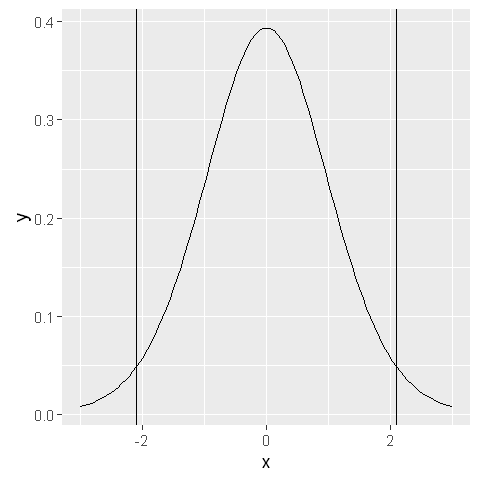

In [21]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) + 
    stat_function(fun = dt, args = list(df = n1 + n2 - 2)) + 
    geom_vline(xintercept = c(qt(0.025, df = n1 + n2 - 2), qt(0.975, df = n1 + n2 - 2)))

帰無仮説を棄却できない．
男女で統計テスト1の得点に有意差があるとは言えない．

$p$ 値は，

In [23]:
2 * pt(t, df = n1 + n2 - 2)

[1] 0.08187801

`t.test()` を使う

In [25]:
t.test(stat_test1.male, stat_test1.female, var.equal = TRUE)


	Two Sample t-test

data:  stat_test1.male and stat_test1.female
t = -1.8429, df = 18, p-value = 0.08188
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.2800355  0.2800355
sample estimates:
mean of x mean of y 
        6         8 
